In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import glob
import numpy as np 
from os.path import join 
import sys

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import fdrcorrection


from matplotlib import rc
rc("font", **{"family": "serif", "serif": ["Palatino"]})
if sys.platform == "darwin":
    rc("text", usetex = True)

from vis import parse_table, pbcc_results, make_dfs, return_asterisks

In [3]:
fdrcorrection([0.073926, 0.034965], alpha=0.05, is_sorted=False)

(array([False, False]), array([0.073926, 0.06993 ]))

In [4]:
fig_width = 6.1 # Important to get the plots right in the PDF
posz = 0.4 # Size of the DOT for mean 
lisz = 0.7 # SIze of width of 95% errorbars
dodge = 0.4

c = sns.color_palette()

In [5]:
glob.glob("*.csv")

['dti-FA-both.csv',
 't1w-males.csv',
 'dti-MD-females.csv',
 'fss-females.csv',
 'fss-males.csv',
 'fss-both.csv',
 't1w-both.csv',
 't1w-0.csv',
 'dti-MD-males.csv',
 'dti-FA-males.csv',
 'run.csv',
 't1w-females.csv',
 't1w-1.csv',
 'dti-FA-females.csv',
 'dti-MD-both.csv']

In [6]:
files = [
    ('dti-FA-both.csv', "DTI", "both"),
    ('fss-females.csv', "FSS", "female"),
    ('fss-males.csv', "FSS", "male"),
    ('fss-both.csv', "FSS", "both"),
    ('t1w-both.csv', "T1w", "both"),
    ('t1w-0.csv', "T1w", "male"),
    ('dti-FA-males.csv', "DTI", "male"),
    ('t1w-1.csv', "T1w", "female"),
    ('dti-FA-females.csv', "DTI", "female")
]

In [7]:
df = pd.DataFrame()
for f, inmod, sex in files:
    df = df.append(pd.read_csv(f).assign(inmod = inmod).assign(sex = sex))

In [8]:
models = ["LogisticRegression", "LinearSVC", "SVC", "GradientBoostingClassifier"]
techniques = ["baseline","cb", "cvcr", "cbcvcr", "cvcrcb"]

In [9]:
df = df.query("model in @models").query("io == 'X-y'").query("technique in @techniques").query("setting == 'pr'")
df.technique = df.technique.map({
        "baseline" : "baseline", 
        "cb" : "cb", 
        "wdcr" : "wdcr",
        "cvcr": "cvcr",
        "cvcrcb" : "cbcvcr", 
        "cbcvcr" : "cbcvcr"
    })
df = df.query("~(model != 'LogisticRegression' and technique == 'cvcr')")
df = df.query("~(model != 'LogisticRegression' and technique == 'cbcvcr')")

In [10]:
df = df.dropna(axis=0, subset=["ba_mean"])

In [11]:
df = df[["inmod", "sex", "technique", "model", "ba_mean", "ba_ci_low", "ba_ci_high", "ba_pvalue", "sens", "spec", "auc_mean", "auc_pvalue"]]

In [12]:
"""

df = df.reset_index(drop=True)

df.model = df.model.map({
        "LogisticRegression" : "LR", 
        "LinearSVC" : "LSVM", 
        "SVC" : "KSVM", 
        "GradientBoostingClassifier" : "GB", 
        "GaussianNB" : "NB"
    })

df['technique'] = pd.Categorical(df['technique'], categories=["baseline", "cb", "cvcr", "cbcvcr"])
df['inmod'] = pd.Categorical(df['inmod'], categories=["FSS", "T1w", "DTI"])
df['sex'] = pd.Categorical(df['sex'], categories=["both", "female", "male"])

df = df.sort_values(by=["inmod", "sex", "technique"])
df = df.reset_index(drop=True)
df = df.rename(columns={
    "inmod":"input", 
    "ba_mean":"BA mean", 
    "ba_ci_low" : "BA low", 
    "ba_ci_high" : "BA high",
    "ba_pvalue" : "BA p", 
    "sens" : "sens",
    "spec" : "spec", 
    "auc_mean" : "AUC mean", 
    "auc_pvalue" : "AUC p"
})

df.to_latex("pred_Xy.tex")
"""

'\n\ndf = df.reset_index(drop=True)\n\ndf.model = df.model.map({\n        "LogisticRegression" : "LR", \n        "LinearSVC" : "LSVM", \n        "SVC" : "KSVM", \n        "GradientBoostingClassifier" : "GB", \n        "GaussianNB" : "NB"\n    })\n\ndf[\'technique\'] = pd.Categorical(df[\'technique\'], categories=["baseline", "cb", "cvcr", "cbcvcr"])\ndf[\'inmod\'] = pd.Categorical(df[\'inmod\'], categories=["FSS", "T1w", "DTI"])\ndf[\'sex\'] = pd.Categorical(df[\'sex\'], categories=["both", "female", "male"])\n\ndf = df.sort_values(by=["inmod", "sex", "technique"])\ndf = df.reset_index(drop=True)\ndf = df.rename(columns={\n    "inmod":"input", \n    "ba_mean":"BA mean", \n    "ba_ci_low" : "BA low", \n    "ba_ci_high" : "BA high",\n    "ba_pvalue" : "BA p", \n    "sens" : "sens",\n    "spec" : "spec", \n    "auc_mean" : "AUC mean", \n    "auc_pvalue" : "AUC p"\n})\n\ndf.to_latex("pred_Xy.tex")\n'

In [13]:
df.query("technique == 'baseline'")

,inmod,sex,technique,model,ba_mean,ba_ci_low,ba_ci_high,ba_pvalue,sens,spec,auc_mean,auc_pvalue
0,DTI,both,baseline,LogisticRegression,0.603365,0.580970,0.630608,0.005994,0.655882,0.550847,0.653888,0.001998
20,DTI,both,baseline,LinearSVC,0.591899,0.565279,0.615591,0.016983,0.661765,0.522034,0.637812,0.003996
40,DTI,both,baseline,SVC,0.621573,0.594903,0.648143,NaN,0.683824,0.559322,0.657203,NaN
60,DTI,both,baseline,GradientBoostingClassifier,0.591588,0.566039,0.615267,0.011988,0.710294,0.472881,0.639756,0.003996
0,FSS,female,baseline,LogisticRegression,0.625420,0.577321,0.662732,0.013986,0.448276,0.802564,0.676658,0.005994
9,FSS,female,baseline,LinearSVC,0.636870,0.619938,0.654686,0.005994,0.427586,0.846154,0.701238,0.001998
18,FSS,female,baseline,SVC,0.643015,0.616622,0.667197,0.009990,0.465517,0.820513,0.718479,0.002997
27,FSS,female,baseline,GradientBoostingClassifier,0.636605,0.602210,0.665827,0.002997,0.465517,0.807692,0.678868,0.003996
0,FSS,male,baseline,LogisticRegression,0.622500,0.591250,0.647500,0.017982,0.730000,0.515000,0.659000,0.021978
9,FSS,male,baseline,LinearSVC,0.596250,0.577500,0.621250,0.034965,0.722500,0.470000,0.631500,0.044955


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


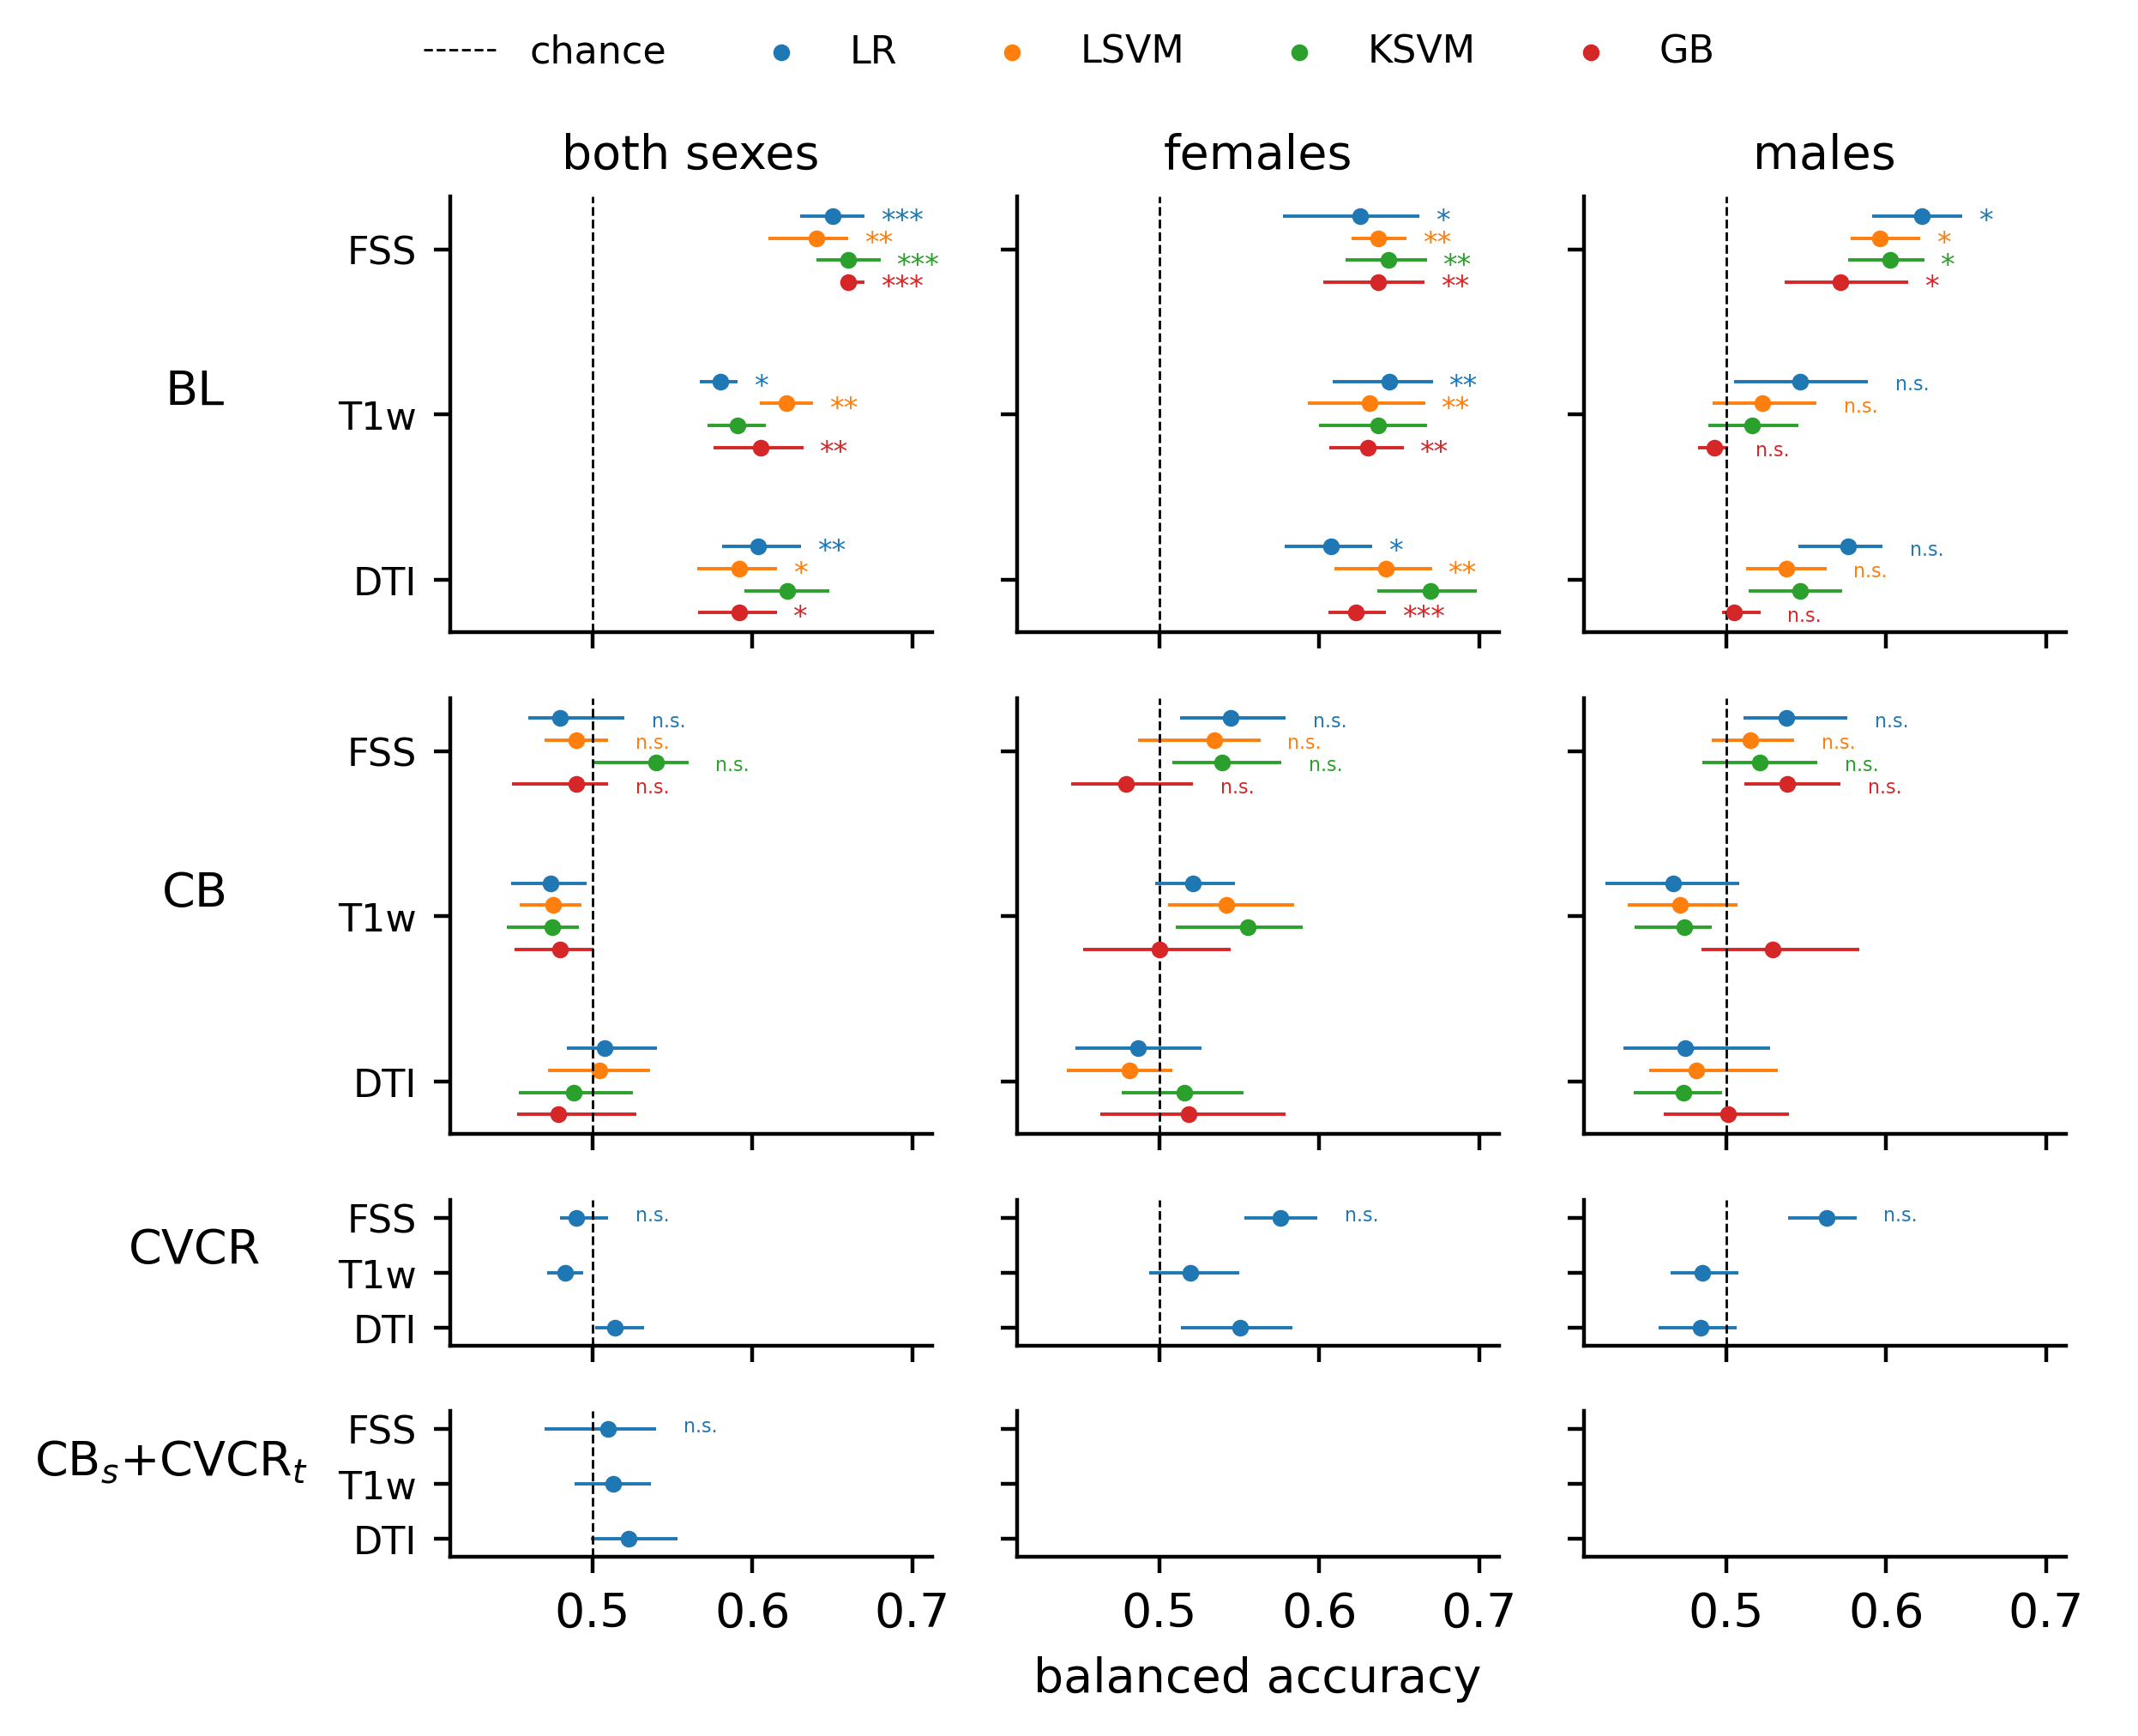

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(6.7, 5.3), sharey=True,sharex=True, dpi=400, \
                       gridspec_kw={'height_ratios': [3,3, 1, 1]})


for i, techn in enumerate(["baseline", "cb", "cvcr", "cbcvcr"]):
    for j, s in enumerate(["both", "female", "male"]):
        if s != "both" and techn == "cbcvcr":
            continue
        dfx = df.query("sex == '{}' and technique == '{}'".format(s, techn))
            
        if techn == "cvcr" or techn == "cbcvcr":
            dodge = 0
        else: 
            dodge = 0.4
        a = sns.pointplot(x="ba_mean", y="inmod", hue="model", data=dfx, join=False,
                     ax=ax[i,j], dodge=dodge, scale=posz, errwidth=0.85, ci=None, order=["FSS", "T1w", "DTI"])
        a.legend_.remove()
        ax[i,j].set_ylabel("")
        ax[i,j].set_xlabel("")
        ax[i,j].axvline(x=0.5, c='k', ls='--', lw=0.5, label="chance")
        
        n_models = len(dfx["model"].unique())
        dodge_ = np.linspace(0, dodge, n_models) - np.linspace(0, dodge, n_models).mean() 
        
        # Add errorbars and significance stars 
        for k, inmo in enumerate(["FSS", "T1w", "DTI"]):
            for m, model in enumerate(dfx["model"].unique()):

                dfxx = dfx.query("model == '{}' and inmod == '{}'".format(model, inmo))
                test_score = dfxx["ba_mean"].values[0]
                ci_low = dfxx["ba_ci_low"].values[0]
                ci_high = dfxx["ba_ci_high"].values[0]
                err = [[abs(test_score - ci_low)], [abs(test_score-ci_high)]]
                ax[i,j].errorbar(test_score, k+dodge_[m], xerr=err, c=c[m], elinewidth=lisz)

                pvalue = dfxx["ba_pvalue"].values[0]
                if (not np.isnan(pvalue)):
                    ast = return_asterisks(pvalue)
                    if ast == "n.s.":
                        ax[i,j].text(ci_high+0.017, k+dodge_[m]+0.05,  r"{}".format(ast), c=c[m], fontsize=4)
                    else:
                        ax[i,j].text(ci_high+0.01, k+dodge_[m]+0.08, r"{}".format(ast), c=c[m], fontsize=6)
        
        
ax[0,0].set_title("both sexes", fontsize=10)
ax[0,1].set_title("females", fontsize=10)
ax[0,2].set_title("males", fontsize=10)

ax[0,0].set_ylabel("BL", rotation=0, labelpad=30, fontsize=10)
ax[1,0].set_ylabel("CB", rotation=0, labelpad=30, fontsize=10)
ax[2,0].set_ylabel("CVCR", rotation=0, labelpad=30, fontsize=10)
ax[3,0].set_ylabel(r"CB$_s$+CVCR$_t$", rotation=0, labelpad=35, fontsize=10)

ax[0,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[1,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[2,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[3,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("balanced accuracy")

handles, _ = ax[0,0].get_legend_handles_labels()
fig.legend(handles, ["chance","LR", "LSVM", "KSVM", "GB"], fontsize=8, frameon=False, loc="upper center",ncol=5)

ax[3,2].spines["left"].set_visible(False)

plt.tight_layout()
sns.despine()
plt.subplots_adjust(top=0.9)
plt.show()

In [15]:
df.query("inmod=='DTI'")

,inmod,sex,technique,model,ba_mean,ba_ci_low,ba_ci_high,ba_pvalue,sens,spec,auc_mean,auc_pvalue
0,DTI,both,baseline,LogisticRegression,0.603365,0.580970,0.630608,0.005994,0.655882,0.550847,0.653888,0.001998
5,DTI,both,cb,LogisticRegression,0.507738,0.483929,0.540476,NaN,0.528810,0.486667,0.496508,NaN
10,DTI,both,cvcr,LogisticRegression,0.513871,0.501732,0.532116,NaN,0.651471,0.376271,0.527617,NaN
15,DTI,both,cbcvcr,LogisticRegression,0.522449,0.498980,0.553061,NaN,0.502041,0.542857,0.507955,NaN
20,DTI,both,baseline,LinearSVC,0.591899,0.565279,0.615591,0.016983,0.661765,0.522034,0.637812,0.003996
25,DTI,both,cb,LinearSVC,0.504683,0.472143,0.536190,NaN,0.680714,0.328651,0.495397,NaN
40,DTI,both,baseline,SVC,0.621573,0.594903,0.648143,NaN,0.683824,0.559322,0.657203,NaN
45,DTI,both,cb,SVC,0.488532,0.453929,0.525238,NaN,0.481349,0.495714,0.502778,NaN
60,DTI,both,baseline,GradientBoostingClassifier,0.591588,0.566039,0.615267,0.011988,0.710294,0.472881,0.639756,0.003996
65,DTI,both,cb,GradientBoostingClassifier,0.478810,0.452976,0.527579,NaN,0.501746,0.455873,0.472063,NaN


In [16]:

pvals = df.ba_pvalue.values

mask_valid = np.isfinite(pvals)
pval_corrected = np.empty(pvals.shape)
pval_corrected[:] = np.nan

_, corr =  fdrcorrection(pvals[mask_valid], alpha=0.5, is_sorted=False)

pval_corrected[mask_valid] = corr

pval_corrected

df = df.assign(pvalc = pval_corrected)

In [17]:
import sys
sys.platform

'linux'

In [18]:
# I want the same plot for id

In [19]:
glob.glob("*.csv")

['dti-FA-both.csv',
 't1w-males.csv',
 'dti-MD-females.csv',
 'fss-females.csv',
 'fss-males.csv',
 'fss-both.csv',
 't1w-both.csv',
 't1w-0.csv',
 'dti-MD-males.csv',
 'dti-FA-males.csv',
 'run.csv',
 't1w-females.csv',
 't1w-1.csv',
 'dti-FA-females.csv',
 'dti-MD-both.csv']

In [20]:
files = [
    ('dti-FA-both.csv', "DTI", "both"),
    ('fss-females.csv', "FSS", "female"),
    ('fss-males.csv', "FSS", "male"),
    ('fss-both.csv', "FSS", "both"),
    ('t1w-both.csv', "T1w", "both"),
    ('t1w-0.csv', "T1w", "male"),
    ('dti-FA-males.csv', "DTI", "male"),
    ('t1w-1.csv', "T1w", "female"),
    ('dti-FA-females.csv', "DTI", "female")
]

df = pd.DataFrame()
for f, inmod, sex in files:
    df = df.append(pd.read_csv(f).assign(inmod = inmod).assign(sex = sex))

In [21]:
df = df.query("model in @models").query("io == 'X-y'").query("technique in @techniques").query("setting == 'id'")
df.technique = df.technique.map({
        "baseline" : "baseline", 
        "cb" : "cb", 
        "wdcr" : "wdcr",
        "cvcr": "cvcr",
        "cvcrcb" : "cbcvcr", 
        "cbcvcr" : "cbcvcr"
    })
df = df.query("~(model != 'LogisticRegression' and technique == 'cvcr')")
df = df.query("~(model != 'LogisticRegression' and technique == 'cbcvcr')")

In [22]:
df = df.dropna(axis=0, subset=["ba_mean"])

In [23]:
df = df[["inmod", "sex", "technique", "model", "ba_mean", "ba_ci_low", "ba_ci_high", "ba_pvalue", "sens", "spec", "auc_mean", "auc_pvalue"]]

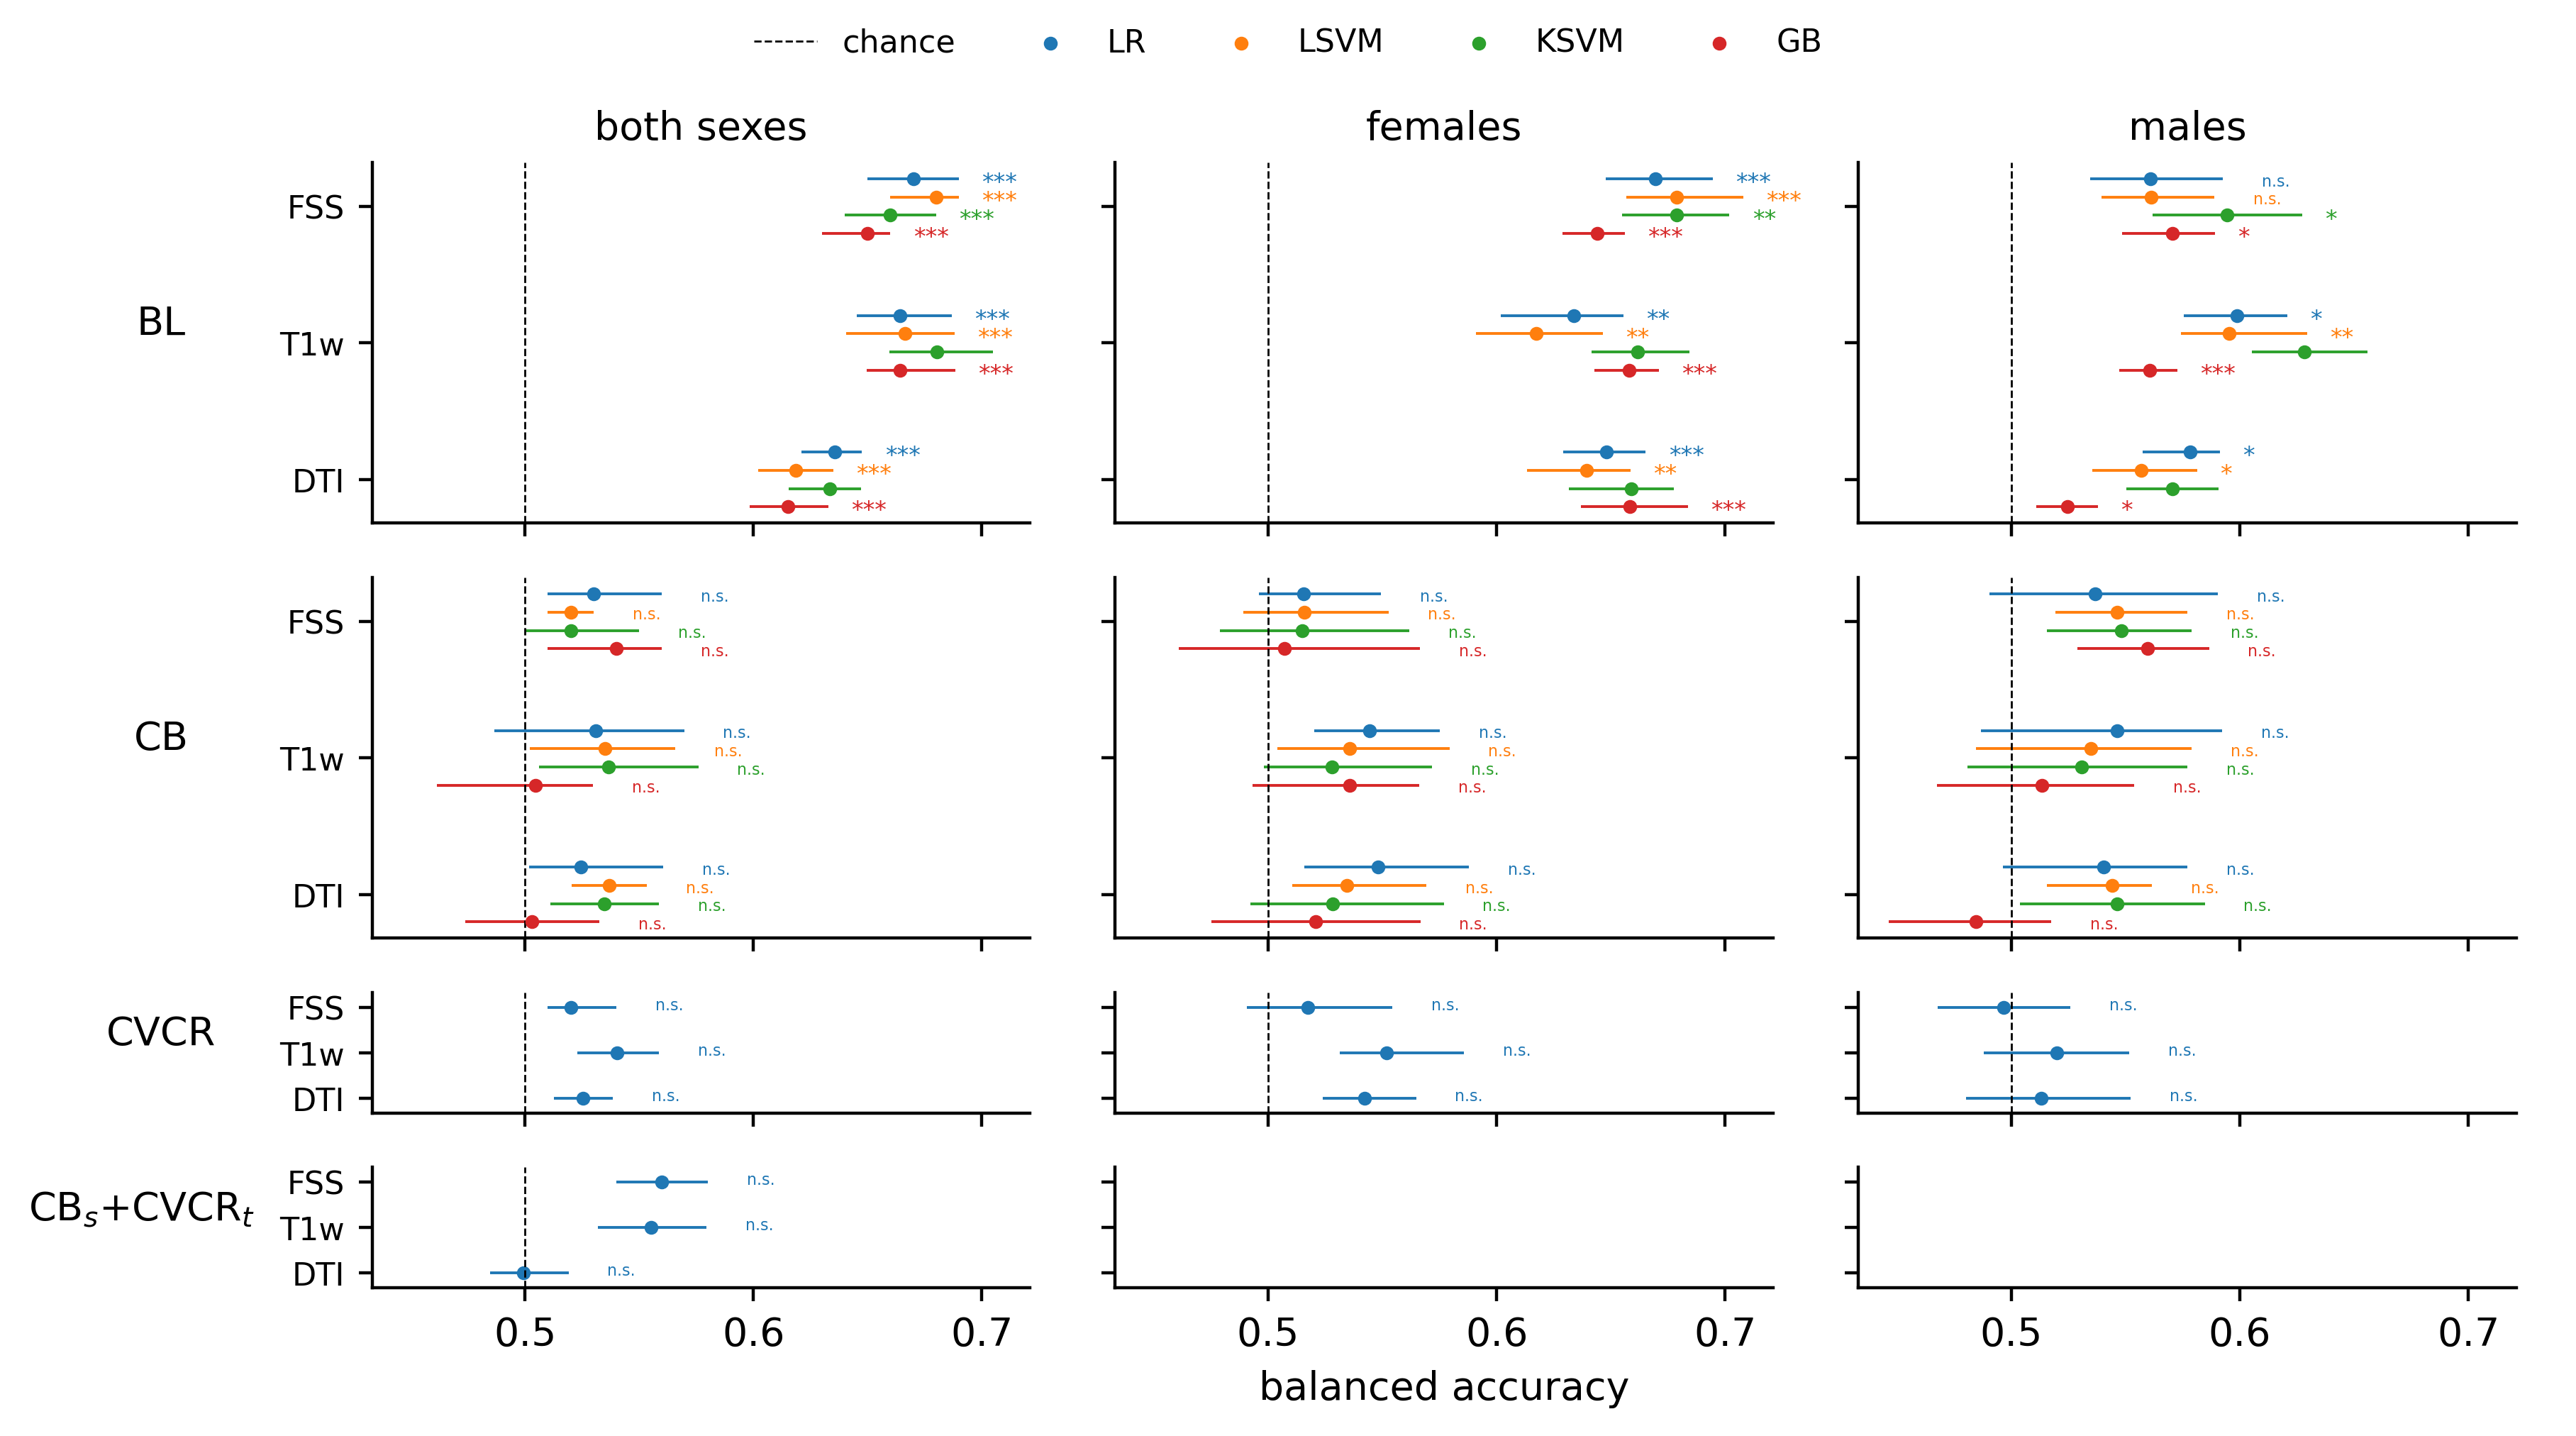

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(9.5, 5.3), sharey=True,sharex=True, dpi=400, \
                       gridspec_kw={'height_ratios': [3,3, 1, 1]})


for i, techn in enumerate(["baseline", "cb", "cvcr", "cbcvcr"]):
    for j, s in enumerate(["both", "female", "male"]):
        if s != "both" and techn == "cbcvcr":
            continue
        dfx = df.query("sex == '{}' and technique == '{}'".format(s, techn))
            
        if techn == "cvcr" or techn == "cbcvcr":
            dodge = 0
        else: 
            dodge = 0.4
        a = sns.pointplot(x="ba_mean", y="inmod", hue="model", data=dfx, join=False,
                     ax=ax[i,j], dodge=dodge, scale=posz, errwidth=0.85, ci=None, order=["FSS", "T1w", "DTI"])
        a.legend_.remove()
        ax[i,j].set_ylabel("")
        ax[i,j].set_xlabel("")
        ax[i,j].axvline(x=0.5, c='k', ls='--', lw=0.5, label="chance")
        
        n_models = len(dfx["model"].unique())
        dodge_ = np.linspace(0, dodge, n_models) - np.linspace(0, dodge, n_models).mean() 
        
        # Add errorbars and significance stars 
        for k, inmo in enumerate(["FSS", "T1w", "DTI"]):
            for m, model in enumerate(dfx["model"].unique()):

                dfxx = dfx.query("model == '{}' and inmod == '{}'".format(model, inmo))
                test_score = dfxx["ba_mean"].values[0]
                ci_low = dfxx["ba_ci_low"].values[0]
                ci_high = dfxx["ba_ci_high"].values[0]
                err = [[abs(test_score - ci_low)], [abs(test_score-ci_high)]]
                ax[i,j].errorbar(test_score, k+dodge_[m], xerr=err, c=c[m], elinewidth=lisz)

                pvalue = dfxx["ba_pvalue"].values[0]
                if (not np.isnan(pvalue)):
                    ast = return_asterisks(pvalue)
                    if ast == "n.s.":
                        ax[i,j].text(ci_high+0.017, k+dodge_[m]+0.05,  r"{}".format(ast), c=c[m], fontsize=4)
                    else:
                        ax[i,j].text(ci_high+0.01, k+dodge_[m]+0.08, r"{}".format(ast), c=c[m], fontsize=6)
        
        
ax[0,0].set_title("both sexes", fontsize=10)
ax[0,1].set_title("females", fontsize=10)
ax[0,2].set_title("males", fontsize=10)

ax[0,0].set_ylabel("BL", rotation=0, labelpad=30, fontsize=10)
ax[1,0].set_ylabel("CB", rotation=0, labelpad=30, fontsize=10)
ax[2,0].set_ylabel("CVCR", rotation=0, labelpad=30, fontsize=10)
ax[3,0].set_ylabel(r"CB$_s$+CVCR$_t$", rotation=0, labelpad=35, fontsize=10)

ax[0,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[1,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[2,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)
ax[3,0].set_yticklabels(["FSS", "T1w", "DTI"], fontsize=8)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("balanced accuracy")

handles, _ = ax[0,0].get_legend_handles_labels()
fig.legend(handles, ["chance","LR", "LSVM", "KSVM", "GB"], fontsize=8, frameon=False, loc="upper center",ncol=5)

ax[3,2].spines["left"].set_visible(False)

plt.tight_layout()
sns.despine()
plt.subplots_adjust(top=0.9)
plt.show()